<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_Augment_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [1]:
!git clone https://github.com/caplove/DX_team_4_repo.git

fatal: destination path 'DX_team_4_repo' already exists and is not an empty directory.


In [2]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [3]:
#Image('./image/image_02.jpg',width=800,height=700)

In [4]:
#Image('./image/image_03.jpg',width=800,height=700)

In [5]:
#Image('./image/image_05.jpg',width=800,height=700)

In [6]:
"""입출력"""
import os

"""전처리"""
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from scipy.interpolate import CubicSpline      # for Data Augmentation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 프레임

In [7]:
# 하위 폴더내에 각각 파일이 있고, 파일(폴더)명에 class 정보가 있을경우 
# 참조 : https://wikidocs.net/39

df=[]
df = pd.DataFrame()


for (path, dir, files) in os.walk("./DX_team_4_repo/Data/"):
                
        for filename in files:
             ext = os.path.splitext(filename)[-1]  # 확장자가 txt 이면...
             if ext == '.txt':
       
                # 해당파일을 DataFrame으로 읽고 class 추가하기
                print(path + '/' + filename)

                data = pd.read_csv(path + '/'+filename,sep='[:, ,]',names=['ID','accx','accy','accz','gyrx','gyry','gyrz','current','NaN'],header=None,index_col=None)
                data = data.drop(['ID','NaN'],axis=1)     # 다수의 sep는 [ A구분자,B구분자 ] 사용
    
                #Class 컬럼추가 (파일명에서  . 앞에 문자열 추출
                class_name = filename.split('.')[0]     
                data.loc[:,'CLASS']=np.array([class_name]*len(data))    

                #모든 Class 데이터 누적 합치기
                df = pd.concat([df,data])

./DX_team_4_repo/Data//coat_3.txt
./DX_team_4_repo/Data//suit_4.txt
./DX_team_4_repo/Data//idle.txt
./DX_team_4_repo/Data//suit_3.txt
./DX_team_4_repo/Data//shirt_2.txt
./DX_team_4_repo/Data//coat_5.txt
./DX_team_4_repo/Data//shirt_5.txt
./DX_team_4_repo/Data//shirt_3.txt
./DX_team_4_repo/Data//suit_1.txt
./DX_team_4_repo/Data//coat_1.txt
./DX_team_4_repo/Data//coat_2.txt
./DX_team_4_repo/Data//coat_4.txt
./DX_team_4_repo/Data//suit_2.txt
./DX_team_4_repo/Data//shirt_1.txt
./DX_team_4_repo/Data//suit_5.txt
./DX_team_4_repo/Data//shirt_4.txt


## x,y 정의

In [8]:
""" 설명 변수 및 반응변수 구분 """
x = df.drop(['CLASS'],axis=1)
y = df['CLASS']

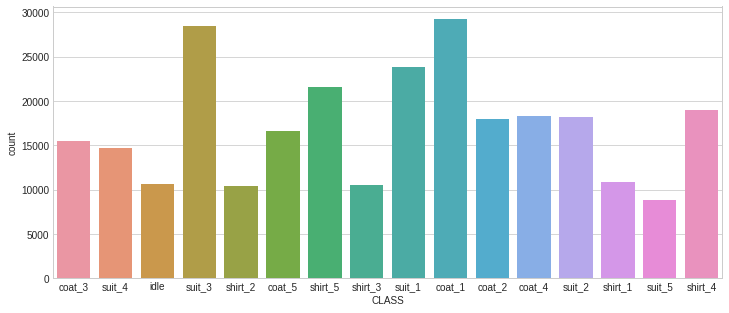

In [9]:
"""분포 확인"""
plt.figure(figsize=(12, 5))
sns.countplot(y)           # 돗수분포
plt.show()

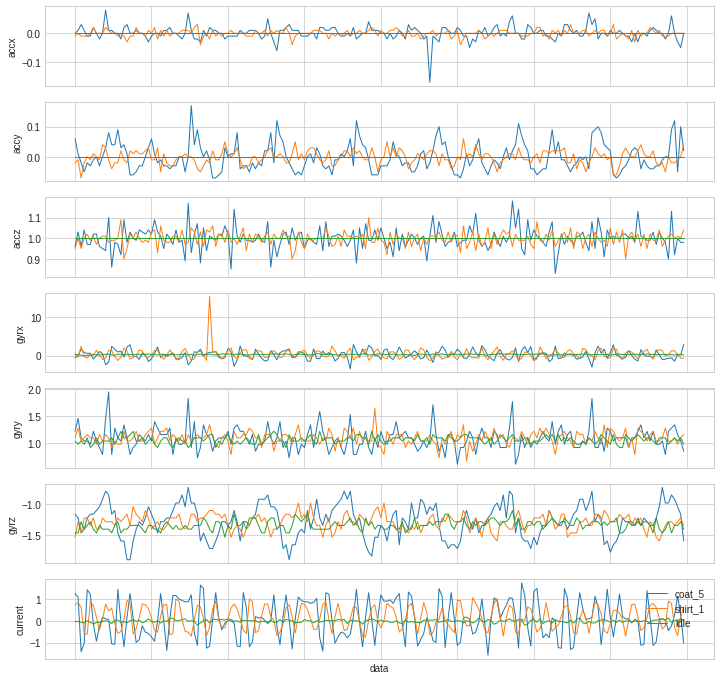

In [10]:
"""데이터 확인"""
# 몇 개의 Class에 대하여, 맨 앞 1초간 데이터 관찰

class_list=['coat_5','shirt_1','idle']
sensor_list=['accx','accy','accz','gyrx','gyry','gyrz','current']
data_length=200       # 2초  @ 10ms sampling

plt.figure(figsize=(12,12))

for i in class_list:
    idx_class = df[df.CLASS == i]

    for j in sensor_list:
        idx_j = sensor_list.index(j)    # j의 위치를 찾아 subplot의 위치를 정함.
        plt.subplot(7,1,idx_j+1)
        plt.plot(idx_class[j][0:data_length],label=i,linewidth=1)
        plt.ylabel(j)
        plt.xticks(visible=False)
    
plt.xlabel('data')
plt.legend(loc='upper right')
plt.show()

In [11]:
#Image('./image/image_06.jpg')

># 데이터 클린징

>>## Kalman Filter

In [12]:
# def kalman_filter(z_meas, x_esti, P):
#     """Kalman Filter Algorithm for One Variable."""
#     # (1) Prediction.
#     x_pred = A * x_esti
#     P_pred = A * P * A + Q

#     # (2) Kalman Gain.
#     K = P_pred * H / (H * P_pred * H + R)

#     # (3) Estimation.
#     x_esti = x_pred + K * (z_meas - H * x_pred)

#     # (4) Error Covariance.
#     P = P_pred - K * H * P_pred

#     return x_esti, P

In [13]:
# # Input parameters.
# time_end = 500
# dt = 1

In [14]:
# # Initialization for system model.
# A = 0.8   # 시간에 따라 상태 변환            Xk+1 = A*Xk + wk   (X: 예측값)
# H = 0.8   # 상태를 측정값으로 변환           Zk   = H*Xk + vx   (Z: 측정값)
# Q = 0.05   # 예측값의 분산
# R = 0.1  # 측정값의 분산
# # Initialization for estimation.
# x_0 = 0  # 14 for book.
# P_0 = 0.1

In [15]:
# time = np.arange(0, time_end, dt)
# n_samples = len(time)
# volt_meas_save = np.zeros(n_samples)
# volt_esti_save = np.zeros(n_samples)

In [16]:
# x_esti, P = None, None
# for i in range(n_samples):
#     z_meas = np.array(x['current'])[i+22000]
#     if i == 0:
#         x_esti, P = x_0, P_0
#     else:
#         x_esti, P = kalman_filter(z_meas, x_esti, P)

#     volt_meas_save[i] = z_meas
#     volt_esti_save[i] = x_esti

In [17]:
# plt.figure(figsize=(20,4))
# plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
# plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
# plt.legend(loc='upper left')
# plt.title('Measurements v.s. Estimation (Kalman Filter)')
# plt.xlabel('Time[ms]')
# plt.ylabel('current[A]')
# #plt.savefig('png/simple_kalman_filter.png')

# **전처리**

---





>## Scaler
>> 가속센서/전류값 range 유사하여 미적용

In [18]:
"""전처리 / 데이터 증강 """
#Image('./image/image_08.jpg',width=800, height=400)
# jittering, Scaling, Rotation,Permutation,Magnitude Warping,TimeWarp,Cropping ... 

'전처리 / 데이터 증강 '

>## Data Augmentation


>>>### *jittering*

In [19]:
seed_no = 2022
np.random.seed(seed = seed_no)

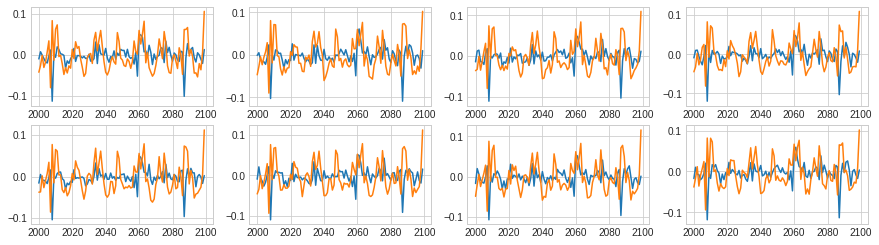

In [20]:
"""jittering"""
sigma = 0.005

def DA_Jitter(X, sigma=sigma):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X + myNoise

x_in_jittering = DA_Jitter(x,sigma)

# sample
#x_sample = x.loc[:,'accx':'accz']    # array에서 slicing  
x_sample = x.iloc[2000:2100,0:2]             # pd DataFrame에서 slicing은 .loc(인덱스기반) 또는 .iloc(위치기반) 써야함.
# print(x.shape,x_in.shape)

# x 전체 데이터에 jittering

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Jitter(x_sample,sigma))

>>>### *Magnitude Warping*

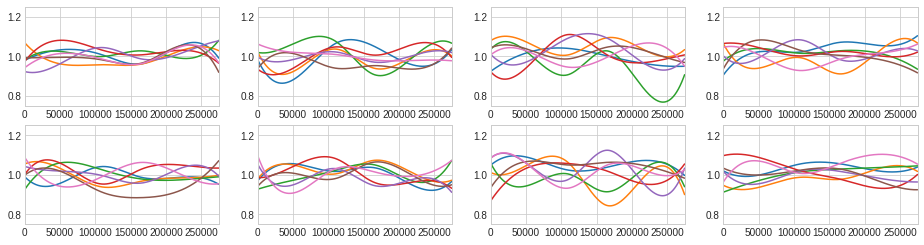

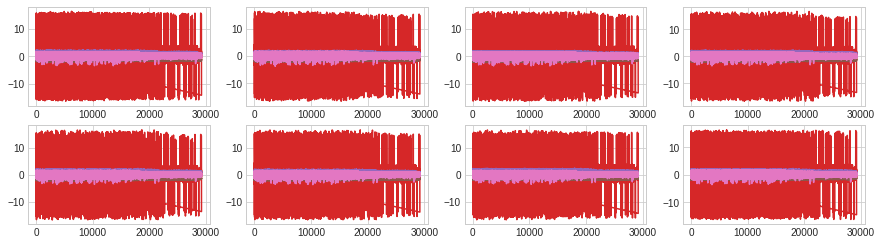

In [21]:
"""Magnitude Warping"""
sigma = 0.05  # default 0.2  (standard deviation)
knot = 4      # default 4    (should be integer)
#seed_no = 2022

## This example using cubic splice is not the best approach to generate random curves. 
## You can use other aprroaches, e.g., Gaussian process regression, Bezier curve, etc.
def GenerateRandomCurves(X, sigma=sigma, knot=4):
    #np.random.seed(seed = seed_no)
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    cs_a = CubicSpline(xx[:,3], yy[:,3])  # 추가
    cs_b = CubicSpline(xx[:,4], yy[:,4])  # 추가
    cs_c = CubicSpline(xx[:,5], yy[:,5])  # 추가
    cs_i = CubicSpline(xx[:,6], yy[:,6])  # 추가
    
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range),cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_i(x_range)]).transpose()



## Random curves around 1.0
fig = plt.figure(figsize=(16,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(GenerateRandomCurves(x.iloc[:,0:3], sigma))
    ax.plot(GenerateRandomCurves(x, sigma, knot))

    plt.axis([0,x.shape[0],0.75,1.25])

def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(DA_MagWarp(x.iloc[:,0:3], sigma))
    ax.plot(DA_MagWarp(x,sigma))

    # ax.set_xlim([0,20000])
    # ax.set_ylim([-5,5])    
    

In [22]:
# x 전체 데이터에 Magnitude Warp
x_in_MagWarp = DA_MagWarp(x,sigma)

>>>### *Scaling*

In [23]:
"""Scaling"""
sigma = 0.025

def DA_Scaling(X, sigma=sigma):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise

x_in_Scaling = DA_Scaling(x,sigma)    

>>>### *Combination*

In [24]:
"""Combination"""
sigma1 = 0.1
sigma2 = 0.01

x_in_Combination = DA_Jitter(DA_Scaling(x,sigma1),sigma2)    

># Augmented SET 선정

In [25]:
"""Augmentation 결과 적용 list"""
# default
# x_list=[x]

# jittering / MagWarp
# x_list=[x, x_in_jittering, x_in_MagWarp]
# jittering / MagWarp / Scaling
# x_list=[x, x_in_jittering, x_in_MagWarp, x_in_Scaling]

# jittering / MagWarp / Scaling / Combination
x_list=[x, x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination]
# print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)

In [26]:
print(x.head())
print(y.head())

   accx  accy  accz  gyrx  gyry  gyrz  current
0 -0.01 -0.02  1.02 -1.16  1.10 -1.40     0.81
1 -0.03 -0.00  0.96  1.34  0.98 -1.40     0.81
2  0.01  0.01  1.05  1.16  1.16 -1.16     0.72
3 -0.01 -0.01  0.98  0.24  1.10 -1.22     0.56
4 -0.01  0.05  0.96 -1.28  1.16 -1.34     0.88
0    coat_3
1    coat_3
2    coat_3
3    coat_3
4    coat_3
Name: CLASS, dtype: object


# 1D CNN 파라미터 선정

In [27]:
# 모듈 불러오기
import os
import time
import copy
import random
# import pickle       # 데이터 저장형태가 pickle일 경우 사용함
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim


# Hyperparameter setting
batch_size = 32
num_classes = 16
num_epochs = 200
window_size = 800  # 시계열일 경우 설정, 만약 레이블이 50마다 있다면? --> 최빈값으로 대표 사용함.

random_seed = 42
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Detect if we have a GPU available

In [28]:
# seed 고정
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [78]:
""" 함수정의 """


def split_train_test(x, y, x_list, window_size):

    x_train_all=pd.DataFrame()
    x_valid_all=pd.DataFrame()
    x_test_all=pd.DataFrame()
    y_train_all=pd.DataFrame()
    y_valid_all=pd.DataFrame()
    y_test_all=pd.DataFrame()
    
    class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])    

    
    for ii in x_list:
    # 각 class별로 n개씩 묶어서(chunk) -->  mfcc -->  merge 함.
    
        """window_size로 잘라 reshape가능하도록"""
    # 8:2 split
        for i in class_list:       # class별로 'idle', 'suit1', ....
            
            
            idx_class = y==i
            """클래스별 데이터셑 나누기"""
            # train data를 시간순으로 8:2의 비율로 train/validation set으로 분할
            # train, validation, test data의 개수 설정
            n_train = int(0.8 * len(x[idx_class]))
            n_valid = int(0.1 * len(x[idx_class]))
            n_test  = int(0.1 * len(x[idx_class]))
            print(n_train,n_valid,n_test)
            
            # train/validation set의 개수에 맞게 데이터 분할
            x_train, y_train = x[idx_class][:n_train], y[idx_class][:n_train]
            x_valid, y_valid = x[idx_class][n_train:n_train+n_valid], y[idx_class][n_train:n_train+n_valid]
            x_test, y_test   = x[idx_class][n_train+n_valid:], y[idx_class][n_train+n_valid:]
            

            print(f"클래스:{i},학습 : {x_train.shape}{y_train.shape}, 검증 : {x_valid.shape}, 테스트 : {x_test.shape}")


            """class별로 merge"""
            x_train_all = pd.concat([x_train_all,x_train],axis=0)
            y_train_all = pd.concat([y_train_all,y_train])
            x_valid_all = pd.concat([x_valid_all,x_valid],axis=0)
            y_valid_all = pd.concat([y_valid_all,y_valid])
            x_test_all =  pd.concat([x_test_all,x_test],axis=0)
            y_test_all =  pd.concat([y_test_all,y_test])
            
    return x_train_all,y_train_all,x_valid_all,y_valid_all,x_test_all,y_test_all
            
            

In [30]:
x_list = [x]

x_train_all,y_train_all,x_valid_all,y_valid_all,x_test_all,y_test_all = split_train_test(x, y, x_list, window_size)

# print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)
# print(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape)

클래스:idle,학습 : (8538, 7)(8538,), 검증 : (1067, 7), 테스트 : (1068, 7)
클래스:suit_1,학습 : (19090, 7)(19090,), 검증 : (2386, 7), 테스트 : (2387, 7)
클래스:suit_2,학습 : (14538, 7)(14538,), 검증 : (1817, 7), 테스트 : (1818, 7)
클래스:suit_3,학습 : (22785, 7)(22785,), 검증 : (2848, 7), 테스트 : (2849, 7)
클래스:suit_4,학습 : (11755, 7)(11755,), 검증 : (1469, 7), 테스트 : (1470, 7)
클래스:suit_5,학습 : (7078, 7)(7078,), 검증 : (884, 7), 테스트 : (886, 7)
클래스:shirt_1,학습 : (8666, 7)(8666,), 검증 : (1083, 7), 테스트 : (1084, 7)
클래스:shirt_2,학습 : (8308, 7)(8308,), 검증 : (1038, 7), 테스트 : (1039, 7)
클래스:shirt_3,학습 : (8383, 7)(8383,), 검증 : (1047, 7), 테스트 : (1049, 7)
클래스:shirt_4,학습 : (15168, 7)(15168,), 검증 : (1896, 7), 테스트 : (1897, 7)
클래스:shirt_5,학습 : (17248, 7)(17248,), 검증 : (2156, 7), 테스트 : (2157, 7)
클래스:coat_1,학습 : (23360, 7)(23360,), 검증 : (2920, 7), 테스트 : (2920, 7)
클래스:coat_2,학습 : (14395, 7)(14395,), 검증 : (1799, 7), 테스트 : (1800, 7)
클래스:coat_3,학습 : (12395, 7)(12395,), 검증 : (1549, 7), 테스트 : (1550, 7)
클래스:coat_4,학습 : (14628, 7)(14628,), 검증 : (1828, 7), 테스트 :

In [31]:

# list 들어오면, n개씩 쪼개서 return   https://jsikim1.tistory.com/141
def list_chunk(lst,n):
    return [lst[i:i+n] for i in range(0,len(lst),n)], len(lst)//n      #  // 몫


def chunk_merge(x, y, no_of_data):

    class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

    df_x = pd.DataFrame()
    df_y = pd.DataFrame()
    
    xy=pd.concat([x,y],axis=1)
    xy.columns = ['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','current','class']    
    
    # chunk
    for i in class_list:       # class별로 'idle', 'suit1', ....
        
        df_all, count = list_chunk(xy[xy['class'] ==i],no_of_data)

    df_xy = pd.DataFrame(xy)
    df_x = np.array(df_xy.drop('class',axis=1))
    df_y = np.array(df_xy['class'])


    """class를 숫자로 변환 for pytorch"""
    y_number=[]
    for i in df_y:
        y_tmp=(np.where(i == class_list))[0][0]    # [0][0] 추가해서 데이터만 추출
        #print (i,y_tmp)
        y_number.append(y_tmp)
        #print(i,y_tmp[0][0])

    df_y=np.array(y_number)


    return df_x, df_y

In [32]:
"""torch용 data 생성"""
no_of_data=400

x_train, y_train = chunk_merge(x_train_all,y_train_all,no_of_data)
x_valid, y_valid = chunk_merge(x_valid_all,y_valid_all,no_of_data)
x_test, y_test   = chunk_merge(x_test_all, y_test_all, no_of_data)


In [33]:
print(x_train.shape,y_train.shape)
y_train

(219660, 7) (219660,)


array([ 0,  0,  0, ..., 15, 15, 15])

In [34]:
T = x_train.shape[0]
print(T)

win = np.split(x_train[:window_size * (T // window_size),:],(T//window_size))


219660


In [62]:
# train/validation/test 데이터를 window_size 시점 길이로 분할
datasets = []
for set in [(x_train, y_train), (x_valid, y_valid), (x_test, y_test)]:
    # 전체 시간 길이 설정
    T = set[0].shape[0]

    # 전체 X 데이터를 window_size 크기의 time window로 분할
    # split(array, indices_or_sections) 함수는 자투리 없이 딱 나누어 떨어져야 하므로, 400으로 나눠떨어지도록 자투리 처리, split은 딱 떨어져야 함..
    # array 부분을   set[0].iloc[:window_size * (T // window_size),:] 로 slicing 먼저해주어야 함.
    # windows = np.split(set[0].iloc[:window_size * (T // window_size),:], T // window_size, axis=0)  


    x_sliced = set[0][:window_size * (T // window_size),:]
    x_sliced_transposed = x_sliced.T
    windows = np.split(x_sliced_transposed,T // window_size, axis=1)

    # split 하고난, windows는 list형태로 돌아가므로 다시 array 형태로 변환해야 함.
    windows = np.concatenate(windows, axis=0) # 세로로 이어붙임.
    print("windows_original:",windows.shape)
    # print(windows[:7,:])
    # windows = windows.reshape(window_size,7,-1)
    windows = windows.reshape(-1,7,window_size)

    print("windows_reshaped:",windows.shape)
    # print(windows[0,:,:])

    # 전체 y 데이터를 window_size 크기에 맞게 분할
    # labels = np.split(set[1][:, :window_size * (T // window_size)], (T // window_size), -1) # y는 2차원이므로...
    # labels = np.round(np.mean(np.concatenate(labels, 0), -1))  # 싯점마다 voting 해서 label 정의한다. 시간축(-1)기준으로 평균 class를 적용하는데, 여기서는 숫자이므로 나중에 round 처리로 함.

    labels = np.split(set[1][:window_size * (T // window_size)], T // window_size) # y는 2차원이므로...
    labels = np.round(np.mean((np.concatenate(labels, 0).reshape(-1,window_size)), -1))  # 싯점마다 voting 해서 label 정의한다. 시간축(-1)기준으로 평균 class를 적용하는데, 여기서는 숫자이므로 나중에 round 처리로 함.

    labels = labels.astype(np.long)
    # print(labels[0])

    # shape 확인
    print(windows.shape,labels.shape)


    # sample data 확인 (마지막 15번 데이터)
    print("sample data : last label")
    print(windows[-1],labels[-1])

    # 분할된 time window 단위의 X, y 데이터를 tensor 형태로 축적
    datasets.append(torch.utils.data.TensorDataset(torch.Tensor(windows), torch.Tensor(labels)))



# train/validation/test DataLoader 구축
trainset, validset, testset = datasets[0], datasets[1], datasets[2]
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False)
valid_loader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)


windows_original: (1918, 800)
windows_reshaped: (274, 7, 800)
(274, 7, 800) (274,)
sample data : last label
[[ 0.01  0.01  0.   ...  0.01  0.01 -0.01]
 [ 0.06  0.04 -0.02 ... -0.06 -0.05 -0.03]
 [ 1.    1.05  0.94 ...  0.98  0.98  0.98]
 ...
 [ 0.92  1.1   0.85 ...  1.04  0.98  1.04]
 [-1.59 -1.65 -2.01 ... -1.59 -1.53 -1.28]
 [-1.18  0.1   1.59 ...  0.52  1.01  1.04]] 15
windows_original: (238, 800)
windows_reshaped: (34, 7, 800)
(34, 7, 800) (34,)
sample data : last label
[[ 0.   -0.01 -0.09 ... -0.05  0.02 -0.03]
 [-0.   -0.04  0.08 ...  0.08  0.07  0.06]
 [ 1.04  0.88  0.99 ...  0.97  1.12  0.92]
 ...
 [ 0.92  0.92  1.22 ...  1.1   1.04  1.04]
 [-0.92 -1.1  -0.79 ... -0.79 -0.92 -1.65]
 [-0.54 -0.44 -0.73 ... -1.02  0.2   1.49]] 15
windows_original: (238, 800)
windows_reshaped: (34, 7, 800)
(34, 7, 800) (34,)
sample data : last label
[[ 0.01  0.01  0.   ...  0.01  0.   -0.  ]
 [-0.05 -0.05 -0.04 ... -0.03 -0.04 -0.02]
 [ 0.97  1.01  1.02 ...  0.99  0.99  1.02]
 ...
 [ 0.98  0.98  0

In [63]:
KERNEL_SIZE_PARAM = 3

# 1-dimensional convolution layer로 구성된 CNN 모델
# 2개의 1-dimensional convolution layer와 1개의 fully-connected layer로 구성되어 있음
class CNN_1D(nn.Module):
    def __init__(self, num_classes):
        super(CNN_1D, self).__init__()
        # 첫 번째 1-dimensional convolution layer 구축
        self.layer1 = nn.Sequential(                # Conv, Relu, Avg를 한번에 레이어로 구성하고, 이를 Sequencial로 사용함.
            # nn.Conv1d(7, 7, kernel_size = KERNEL_SIZE_PARAM),      # Conv(input,output, 3개를 한번에 보겠다.)
            nn.Conv1d(7, 7, kernel_size=KERNEL_SIZE_PARAM),      # Conv(input,output, 3개를 한번에 보겠다.)
            # nn.Conv1d(561, 64, kernel_size=3),      # Conv(input,output, 3개를 한번에 보겠다.)

            nn.ReLU(),
            nn.AvgPool1d(2)                         # 
        )
        # 두 번째 1-dimensional convolution layer 구축
        self.layer2 = nn.Sequential(
            nn.Conv1d(7, 7, kernel_size = KERNEL_SIZE_PARAM),
            nn.ReLU(),
            nn.AvgPool1d(2)
        )
        # fully-connected layer 구축
        # self.fc = nn.Linear(64 * 11, num_classes)
        # self.fc = nn.Linear(64 * 1, num_classes)
        self.fc = nn.Linear(1386, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [64]:
# 1D CNN 구축
model = CNN_1D(num_classes=num_classes)
model = model.to(device)
print(model)

CNN_1D(
  (layer1): Sequential(
    (0): Conv1d(7, 7, kernel_size=(3,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
  )
  (layer2): Sequential(
    (0): Conv1d(7, 7, kernel_size=(3,), stride=(1,))
    (1): ReLU()
    (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
  )
  (fc): Linear(in_features=1386, out_features=16, bias=True)
)


In [65]:
# SGD optimizer 구축하기
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [74]:
def train_model(model, dataloaders, criterion, num_epochs, optimizer):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):

      if epoch % 20==0:
        print('Epoch {}/{}'.format(epoch + 1, num_epochs))
        print('-' * 10)

      # 각 epoch마다 순서대로 training과 validation을 진행
      for phase in ['train', 'val']:
          if phase == 'train':
              model.train()  # 모델을 training mode로 설정
          else:
              model.eval()   # 모델을 validation mode로 설정
              
          running_loss = 0.0
          running_corrects = 0
          running_total = 0

          # training과 validation 단계에 맞는 dataloader에 대하여 학습/검증 진행
          for inputs, labels in dataloaders[phase]:
              inputs = inputs.to(device)
              labels = labels.to(device, dtype=torch.long)
              # labels = labels.to(device, dtype=torch.int64)

              # parameter gradients를 0으로 설정
              optimizer.zero_grad()

              # forward
              # training 단계에서만 gradient 업데이트 수행
              with torch.set_grad_enabled(phase == 'train'):
                  # input을 model에 넣어 output을 도출한 후, loss를 계산함
                  outputs = model(inputs)
                  loss = criterion(outputs, labels)
  
                  # output 중 최댓값의 위치에 해당하는 class로 예측을 수행
                  _, preds = torch.max(outputs, 1)

                  # backward (optimize): training 단계에서만 수행
                  if phase == 'train':
                      loss.backward()
                      optimizer.step()

              # batch별 loss를 축적함
              running_loss += loss.item() * inputs.size(0)
              running_corrects += torch.sum(preds == labels.data)
              running_total += labels.size(0)

          # epoch의 loss 및 accuracy 도출
          epoch_loss = running_loss / running_total
          epoch_acc = running_corrects.double() / running_total

          if epoch % 20==0:
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

          # validation 단계에서 validation loss가 감소할 때마다 best model 가중치를 업데이트함
          if phase == 'val' and epoch_acc > best_acc:
  
              best_acc = epoch_acc
              best_model_wts = copy.deepcopy(model.state_dict())
          if phase == 'val':
              val_acc_history.append(epoch_acc)

      # print()

    # 전체 학습 시간 계산
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # validation loss가 가장 낮았을 때의 best model 가중치를 불러와 best model을 구축함
    model.load_state_dict(best_model_wts)
    
    # best model 가중치 저장
    # torch.save(best_model_wts, '../output/best_model.pt')
    return model, val_acc_history

In [75]:
# trining 단계에서 사용할 Dataloader dictionary 생성
dataloaders_dict = {
    'train': train_loader,
    'val': valid_loader
}


In [76]:
# loss function 설정
criterion = nn.CrossEntropyLoss()

In [77]:
# 모델 학습
model, val_acc_history = train_model(model, dataloaders_dict, criterion, num_epochs, optimizer)

Epoch 1/200
----------
train Loss: 0.2875 Acc: 0.9891
val Loss: 3.0413 Acc: 0.1471
Epoch 21/200
----------
train Loss: 0.0723 Acc: 1.0000
val Loss: 3.5813 Acc: 0.1471
Epoch 41/200
----------
train Loss: 0.0328 Acc: 1.0000
val Loss: 3.9112 Acc: 0.1471
Epoch 61/200
----------
train Loss: 0.0200 Acc: 1.0000
val Loss: 4.1296 Acc: 0.1471
Epoch 81/200
----------
train Loss: 0.0141 Acc: 1.0000
val Loss: 4.2919 Acc: 0.1471
Epoch 101/200
----------
train Loss: 0.0107 Acc: 1.0000
val Loss: 4.4205 Acc: 0.1471
Epoch 121/200
----------
train Loss: 0.0085 Acc: 1.0000
val Loss: 4.5269 Acc: 0.1471
Epoch 141/200
----------
train Loss: 0.0071 Acc: 1.0000
val Loss: 4.6177 Acc: 0.1471
Epoch 161/200
----------
train Loss: 0.0060 Acc: 1.0000
val Loss: 4.6969 Acc: 0.1471
Epoch 181/200
----------
train Loss: 0.0052 Acc: 1.0000
val Loss: 4.7672 Acc: 0.1471
Training complete in 0m 9s
Best val Acc: 0.147059


In [60]:
def test_model(model, test_loader):
    model.eval()   # 모델을 validation mode로 설정
    
    # test_loader에 대하여 검증 진행 (gradient update 방지)
    with torch.no_grad():
        corrects = 0
        total = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device, dtype=torch.long)

            # forward
            # input을 model에 넣어 output을 도출
            outputs = model(inputs)

            # output 중 최댓값의 위치에 해당하는 class로 예측을 수행
            _, preds = torch.max(outputs, 1)

            # batch별 정답 개수를 축적함
            corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

    # accuracy를 도출함
    test_acc = corrects.double() / total
    print('Testing Acc: {:.4f}'.format(test_acc))

In [82]:
# 모델 검증
test_model(model, test_loader)

Testing Acc: 0.1176
